In [0]:
import gensim
from gensim import corpora
from pprint import pprint

from gensim.utils import simple_preprocess
from nltk.tokenize import word_tokenize
from smart_open import smart_open
import os


from nltk.corpus import stopwords
# from gensim.utils import simple_preprocess, lemmatize
# from gensim.models import LdaModel, LdaMulticore
# import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
with open('/content/gdrive/My Drive/Analyses/hacking/merkel_speech.txt', 'r') as f:
  content = f.read()

In [0]:
# Tokenize sentences into words
words = word_tokenize(content)

# cleaned_words = []
# for word in words:
#     if word not in stop_words and word.isalpha():
#         cleaned_words.append(word.lower())

In [0]:
def preprocess_words(words, stop_words):
    cleaned_words = []
    for word in words:
        if word not in stop_words and word.isalpha():
            cleaned_words.append(word.lower())
    return cleaned_words

In [0]:
cleaned_words = preprocess_words(words=words, stop_words=stop_words)

In [0]:
FreqDist(cleaned_words).keys()

dict_keys(['president', 'bacow', 'fellows', 'corporation', 'members', 'board', 'overseers', 'alumni', 'faculty', 'proud', 'parents', 'graduates', 'today', 'day', 'joy', 'it', 'many', 'congratulations', 'i', 'delighted', 'would', 'like', 'tell', 'experiences', 'this', 'ceremony', 'marks', 'end', 'intensive', 'probably', 'also', 'hard', 'chapter', 'lives', 'now', 'door', 'new', 'life', 'opening', 'that', 'exciting', 'inspiring', 'the', 'german', 'writer', 'hermann', 'hesse', 'wonderful', 'words', 'situation', 'quote', 'continue', 'native', 'language', 'wrote', 'in', 'beginnings', 'dwells', 'magic', 'force', 'for', 'guarding', 'us', 'helping', 'these', 'inspired', 'completed', 'physics', 'degree', 'age', 'back', 'year', 'world', 'divided', 'east', 'west', 'cold', 'war', 'grew', 'germany', 'gdr', 'time', 'part', 'homeland', 'free', 'dictatorship', 'people', 'oppressed', 'monitored', 'state', 'political', 'opponents', 'persecuted', 'government', 'afraid', 'run', 'away', 'freedom', 'and', 'b

In [0]:
from nltk.probability import FreqDist
import pandas as pd
word_counts = pd.Series(FreqDist(cleaned_words)).sort_values(ascending=False)

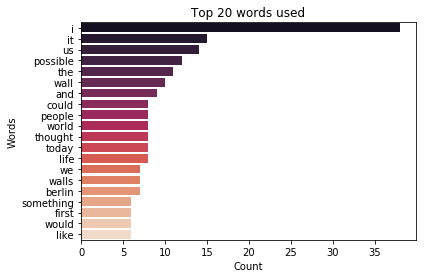

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.barplot(y=word_counts[:20].index, x=word_counts[:20].values, palette="rocket")
ax.set_title("Top 20 words used");
ax.set_xlabel("Count");
ax.set_ylabel("Words");

In [0]:
word_tags = nltk.pos_tag(cleaned_words)

In [0]:
word_tags[:10]

[('president', 'NN'),
 ('bacow', 'NN'),
 ('fellows', 'VBZ'),
 ('corporation', 'NN'),
 ('members', 'NNS'),
 ('board', 'NN'),
 ('overseers', 'VBZ'),
 ('members', 'NNS'),
 ('alumni', 'NNS'),
 ('board', 'NN')]

In [0]:
nouns = [word[0] for word in word_tags if word[1] == 'NN']

In [0]:
noun_counts = pd.Series(FreqDist(nouns)).sort_values(ascending=False)

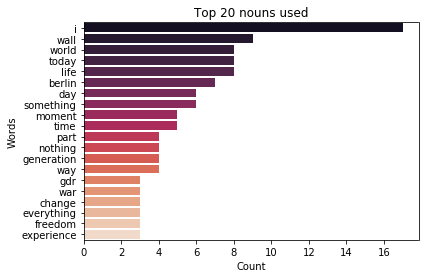

In [0]:
fig, ax = plt.subplots()
sns.barplot(y=noun_counts[:20].index, x=noun_counts[:20].values, palette="rocket")
ax.set_title("Top 20 nouns used");
ax.set_xlabel("Count");
ax.set_ylabel("Words");

In [0]:
dd = dictionary.token2id
[(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]

[('thank', 687),
 ('risks', 686),
 ('openness', 685),
 ('involves', 684),
 ('taken', 683),
 ('forget', 682),
 ('yourselves', 681),
 ('simply', 680),
 ('asking', 679),
 ('multilateral', 678),
 ('joint', 677),
 ('interests', 676),
 ('action', 675),
 ('six', 674),
 ('remember', 673),
 ('wish', 672),
 ('stay', 671),
 ('leave', 670),
 ('things', 669),
 ('study', 668),
 ('store', 667),
 ('science', 666),
 ('ready', 665),
 ('politician', 664),
 ('knows', 663),
 ('finish', 662),
 ('feel', 661),
 ('completely', 660),
 ('clear', 659),
 ('believe', 658),
 ('without', 657),
 ('whole', 656),
 ('space', 655),
 ('sixth', 654),
 ('risk', 653),
 ('night', 652),
 ('letting', 651),
 ('go', 650),
 ('ending', 649),
 ('difference', 648),
 ('death', 647),
 ('consists', 646),
 ('call', 645),
 ('beginning', 644),
 ('worry', 643),
 ('work', 642),
 ('went', 641),
 ('scientist', 640),
 ('re', 639),
 ('politics', 638),
 ('occasion', 637),
 ('moments', 636),
 ('might', 635),
 ('magical', 634),
 ('left', 633),
 ('kn